In [2]:
import networkx as nx
%matplotlib inline

# Capitulo 2 Tutorial
Tenga en cuenta que muchos ejercicios van seguidos de un bloque con algunas afirmaciones. Estas afirmaciones pueden estar precedidas por algún código de configuración. Se proporcionan para indicarle que está en el camino correcto: recibir un AssertionError probablemente signifique que ha hecho algo mal. Contenido:

Caminos

Componentes conectados Rutas y componentes dirigidos Conjunto de datos: red de tráfico aéreo de EE. UU.


## 1. Paths

Comencemos con una red no dirigida muy simple.

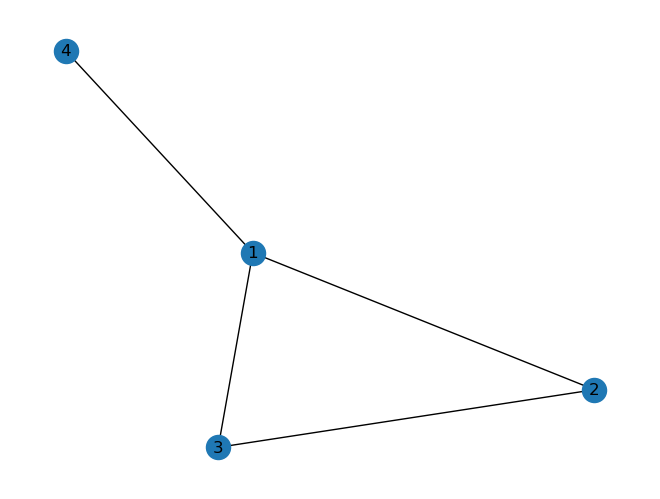

In [3]:
G = nx.Graph()

G.add_nodes_from([1,2,3,4])

G.add_edges_from([(1,2),(2,3),(1,3),(1,4)])

nx.draw(G, with_labels=True)

Un camino en una red es una secuencia de aristas que conectan dos nodos. En este ejemplo simple, podemos ver fácilmente que efectivamente hay al menos una ruta que conecta los nodos 3 y 4. Podemos verificar esto con NetworkX:

In [4]:
nx.has_path(G, 3, 4)

True

Puede haber más de un camino entre dos nodos. Nuevamente, considerando los nodos 3 y 4, hay dos caminos "simples" de este tipo:

In [5]:
list(nx.all_simple_paths(G, 3, 4))

[[3, 2, 1, 4], [3, 1, 4]]

Un camino simple es uno sin ciclos. Si permitiéramos ciclos, habría infinitos caminos porque siempre se podría dar la vuelta al ciclo tantas veces como se desee.

A menudo estamos más interesados en los caminos *más cortos*. En una red no ponderada, el camino más corto es el que tiene menos aristas. Podemos ver que de los dos caminos simples entre los nodos 3 y 4, uno es más corto que el otro. Podemos obtener esta ruta más corta con una sola función NetworkX:

In [6]:
nx.shortest_path(G, 3, 4)

[3, 1, 4]

Si solo te importa la longitud de la ruta, también hay una función para eso:

In [7]:
nx.shortest_path_length(G, 3, 4)

2

Tenga en cuenta que la longitud de un camino se define aquí por el número de aristas en el camino, no por el número de nodos, lo que implicas

    nx.shortest_path_length(G, u, v) == len(nx.shortest_path(G, u, v)) - 1
    
para nodos $u$ y $v$.

## 2. Componentes conectados

En la red simple de arriba, podemos ver que para *cada* par de nodos, podemos encontrar una ruta que los conecte. Esta es la definición de un gráfico *conectado*. Podemos verificar esta propiedad para un gráfico dado:

In [8]:
nx.is_connected(G)

True

No todos los gráficos están conectados:

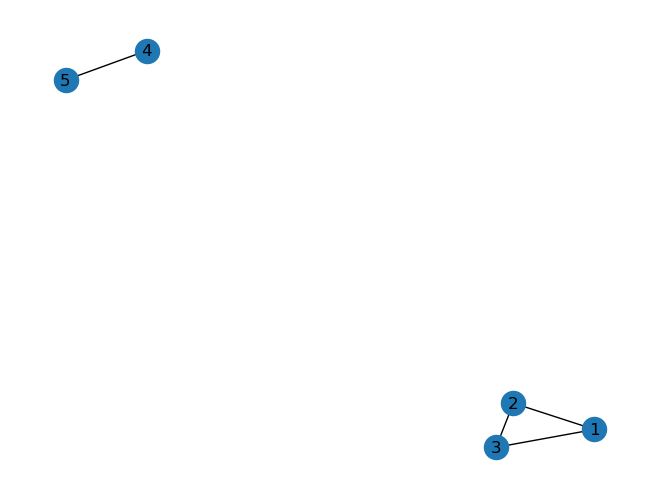

In [9]:
G = nx.Graph()

nx.add_cycle(G, (1,2,3))
G.add_edge(4,5)

nx.draw(G, with_labels=True)

In [10]:
nx.is_connected(G)

False

Y NetworkX generará un error si solicita una ruta (path) entre nodos donde no existe ninguno:

In [11]:
nx.has_path(G, 3, 5)

False

In [12]:
nx.shortest_path(G, 3, 5)

NetworkXNoPath: No path between 3 and 5.

Visualmente, podemos identificar dos componentes conectados en nuestro gráfico. Verifiquemos esto:

In [ ]:
nx.number_connected_components(G)

2

La función `nx.connected_components()` toma un gráfico y devuelve una lista de conjuntos de nombres de nodos, uno de esos conjuntos para cada componente conectado. Verifique que los dos conjuntos en la siguiente lista correspondan a los dos componentes conectados en el dibujo del gráfico anterior:

In [ ]:
list(nx.connected_components(G))

[{1, 2, 3}, {4, 5}]

En caso de que no esté familiarizado con los conjuntos de Python, son colecciones de elementos sin duplicados. Estos son útiles para recopilar nombres de nodos porque los nombres de los nodos deben ser únicos. Al igual que con otras colecciones, podemos obtener el número de elementos de un conjunto con la función `len`:

In [ ]:
components = list(nx.connected_components(G))
len(components[0])

3

A menudo nos preocupamos por el componente conectado más grande, que a veces se denomina núcleo de la red. Podemos hacer uso de la función max incorporada de Python para obtener el componente conectado más grande. De forma predeterminada, la función max de Python ordena las cosas en orden lexicográfico (es decir, alfabético), lo que no es útil aquí. Queremos el componente máximo conectado cuando se ordena por tamaño, por lo que pasamos len como una función clave:


In [ ]:
max(nx.connected_components(G), key=len)

{1, 2, 3}

Si bien a menudo es suficiente tener solo la lista de nombres de nodos, a veces necesitamos el subgrafo real que consiste en el componente conectado más grande. Una forma de obtener esto es pasar la lista de nombres de nodos a la función `G.subgraph()`:

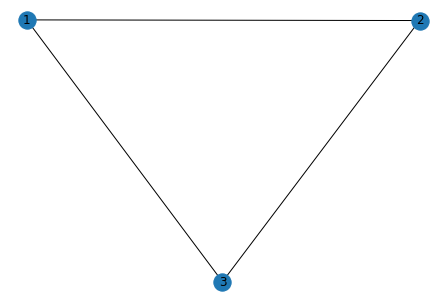

In [ ]:
core_nodes = max(nx.connected_components(G), key=len)
core = G.subgraph(core_nodes)

nx.draw(core, with_labels=True)

Aquellos de ustedes que usan la función de completar con tabulación también notarán una función `nx.connected_component_subgraphs()`. Esto también se puede usar para obtener el subgráfico principal, pero el método que se muestra es más eficiente cuando solo se preocupa por el componente conectado más grande.

# 3. Rutas y componentes dirigidos

Extendamos estas ideas sobre caminos y componentes conectados a grafos dirigidos.

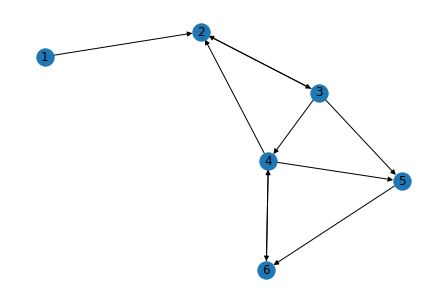

In [ ]:
D = nx.DiGraph()
D.add_edges_from([
    (1,2),
    (2,3),
    (3,2), (3,4), (3,5),
    (4,2), (4,5), (4,6),
    (5,6),
    (6,4),
])
nx.draw(D, with_labels=True)

###  Caminos dirigidos

Sabemos que en un grafo dirigido, una arista de un nodo arbitrario $u$ a un nodo arbitrario $v$ no implica que exista una arista de $v$ a $u$. Dado que las rutas deben seguir la dirección del borde en los gráficos dirigidos, se aplica la misma asimetría para las rutas. Observe que este gráfico tiene un camino de 1 a 4, pero no en la dirección inversa.

In [ ]:
nx.has_path(D, 1, 4)

True

In [ ]:
nx.has_path(D, 4, 1)

False

Las otras funciones de NetworkX que se ocupan de las rutas también tienen en cuenta esta asimetría:

In [ ]:
nx.shortest_path(D, 2, 5)

[2, 3, 5]

In [ ]:
nx.shortest_path(D, 5, 2)

[5, 6, 4, 2]

Dado que no hay borde de 5 a 3, el camino más corto de 5 a 2 no puede simplemente retroceder el camino más corto de 2 a 5, tiene que ir por una ruta más larga a través de los nodos 6 y 4.

### Coponentes directos

Las redes dirigidas tienen dos tipos de conectividad. *Strongly connected* significa que existe un camino directo entre cada par de nodos, es decir, que desde cualquier nodo podemos llegar a cualquier otro nodo siguiendo la direccionalidad del borde. Piense en los automóviles en una red de calles de un solo sentido: no pueden conducir contra el flujo del tráfico.

In [ ]:
nx.is_strongly_connected(D)

False

*Weakly connected* significa que existe un camino entre cada par de nodos, independientemente de la dirección. Piense en los peatones en una red de calles de sentido único: caminan por las aceras para que no les importe la dirección del tráfico.

In [ ]:
nx.is_weakly_connected(D)

True

Si una red está fuertemente conectada, también está débilmente conectada. Lo contrario no siempre es cierto, como se ve en este ejemplo.

La función `is_connected` para gráficos no dirigidos generará un error cuando se le proporcione un gráfico dirigido.

In [14]:
# This will raise an error
nx.is_connected(D)

NameError: name 'D' is not defined

En el caso dirigido, en lugar de `nx.connected_components` ahora tenemos `nx.weakly_connected_components` y `nx.strongly_connected_components`:

In [ ]:
list(nx.weakly_connected_components(D))

[{1, 2, 3, 4, 5, 6}]

In [ ]:
list(nx.strongly_connected_components(D))

[{2, 3, 4, 5, 6}, {1}]

## 4. Conjunto de datos: red de tráfico aéreo de EE. UU.

Este repositorio contiene varios conjuntos de datos de red de ejemplo. Entre estos se encuentra una red de rutas de viajes aéreos de EE. UU.:

In [ ]:
G = nx.read_graphml('openflights_usa.graphml.gz')

Los nodos de este gráfico son aeropuertos, representados por sus [códigos IATA](https://en.wikipedia.org/wiki/List_of_airports_by_IATA_code:_A); dos nodos están conectados con un borde si hay un vuelo programado que conecta directamente estos dos aeropuertos. Asumiremos que este gráfico no está dirigido, ya que un vuelo en una dirección generalmente significa que hay un vuelo de regreso.

Por lo tanto, este gráfico tiene bordes
```
[('HOM', 'ANC'), ('BGM', 'PHL'), ('BGM', 'IAD'), ...]
```
donde ANC es Anchorage, IAD es Washington Dulles, etc.

Estos nodos también tienen **atributos** asociados con ellos, que contienen información adicional sobre los aeropuertos:

In [ ]:
G.nodes['IND']

{'name': 'Indianapolis International Airport',
 'latitude': 39.7173,
 'longitude': -86.294403,
 'IATA': 'IND'}

Los atributos de los nodos se almacenan como un diccionario, por lo que se puede acceder a los valores individualmente como tales:

In [ ]:
G.nodes['IND']['name']

'Indianapolis International Airport'

# Ejercicio 1

¿Hay un vuelo directo de Indianápolis a Fairbanks, Alaska (FAI)? Un vuelo directo es aquel que no tiene escalas intermedias.

In [ ]:
G.has_edge('IND', 'FAI')

False


No hay un vuelo directo de Indianapolis a Fairbanks 

#  Ejercicio 2

Si quisiera volar de Indianápolis a Fairbanks, Alaska, ¿cuál sería el itinerario con la menor cantidad de vuelos?

In [ ]:
nx.shortest_path(G, 'IND', 'FAI') 

['IND', 'BOS', 'SEA', 'FAI']

In [ ]:
#El punto de partda es:
G.nodes['IND']['name']

'Indianapolis International Airport'

In [ ]:
#Conectando con:
G.nodes['BOS']['name']

'General Edward Lawrence Logan International Airport'

In [ ]:
#Conectando luego con: 
G.nodes['SEA']['name']

'Seattle Tacoma International Airport'

In [ ]:
#Para llegar a 
G.nodes['FAI']['name']

'Fairbanks International Airport'

#  Ejercicio 3

¿Es posible viajar desde cualquier aeropuerto de los EE. UU. a cualquier otro aeropuerto de los EE. UU., posiblemente utilizando vuelos de conexión? En otras palabras, ¿existe un camino en la red entre cada posible par de aeropuertos?

In [ ]:
nx.is_connected(G)

False

No, no se puede viajar a cualquier aeropuerto desde cualuier punto puesto que no estan conectados todos